# PIMA Indians Diabetes Dataset - Complete Machine Learning Analysis

This notebook presents a comprehensive machine learning analysis of the Pima Indians Diabetes dataset with 8 algorithms, advanced optimization, and explainable AI.

## Table of Contents
1. [Load Libraries and Data](#1)
2. [Data Overview and EDA](#2)
3. [Missing Values Analysis](#3)
4. [Feature Engineering (16 Features)](#4)
5. [Preprocessing Pipeline](#5)
6. [8 Machine Learning Algorithms](#6)
7. [Cross Validation and Optimization](#7)
8. [Explainable AI (XAI)](#8)
9. [Final Ensemble Model ](#9)
10. [AutoML Analysis](#10)
11. [Results Summary](#11)

## <a id='1'>1. Load Libraries and Data</a>

In [97]:
# Extended analysis imports
#=================================== Basic libraries =========================================#
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

#=================================== ML libraries =========================================#

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#===================== Evaluation and Optimization Libraries ===============================#


from sklearn.model_selection import (StratifiedKFold, RandomizedSearchCV, cross_validate, 
                                   GridSearchCV, learning_curve, validation_curve, 
                                   train_test_split, cross_val_score)
from sklearn.metrics import (classification_report, roc_auc_score, average_precision_score, 
                           confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, 
                           precision_score, recall_score, f1_score)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.inspection import permutation_importance, partial_dependence


#============================= Visualization Libraries ===============================#

import shap
import optuna
from scipy.stats import randint, uniform
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as py
from sklearn.ensemble import VotingClassifier

#================================ Time context manager=================================#
import time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# Ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Load Pima Indians Diabetes dataset
print("Loading Pima Indians Diabetes dataset...")
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
csv_path = os.path.join(path, "diabetes.csv")
data = pd.read_csv(csv_path)
print(f"Dataset loaded successfully! Shape: {data.shape}")

Loading Pima Indians Diabetes dataset...
Dataset loaded successfully! Shape: (768, 9)


## <a id='2'>2. Data Overview and EDA</a>

In [99]:
# Data overview
print("Dataset Information:")
print(data.info())
print("\nFirst 5 rows:")
display(data.head())
print("\nStatistical Summary:")
display(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


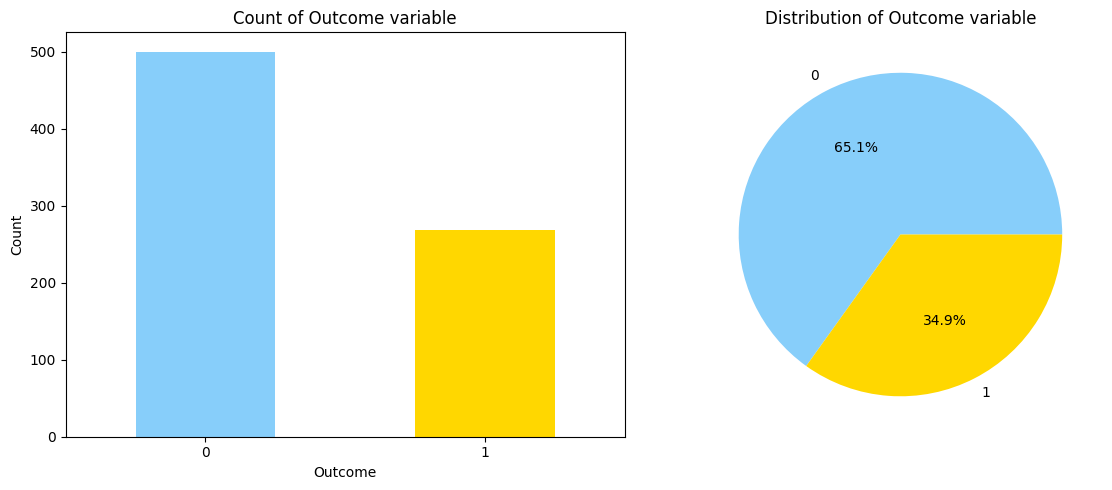

Healthy (0): 500 (65.1%)
Diabetic (1): 268 (34.9%)


In [100]:
# Target distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
data['Outcome'].value_counts().plot(kind='bar', ax=axes[0], color=['lightskyblue', 'gold'])
axes[0].set_title('Count of Outcome variable')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
data['Outcome'].value_counts().plot(kind='pie', ax=axes[1], colors=['lightskyblue', 'gold'], autopct='%1.1f%%')
axes[1].set_title('Distribution of Outcome variable')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"Healthy (0): {data['Outcome'].value_counts()[0]} ({data['Outcome'].value_counts()[0]/len(data)*100:.1f}%)")
print(f"Diabetic (1): {data['Outcome'].value_counts()[1]} ({data['Outcome'].value_counts()[1]/len(data)*100:.1f}%)")

## <a id='3'>3. Missing Values Analysis</a>

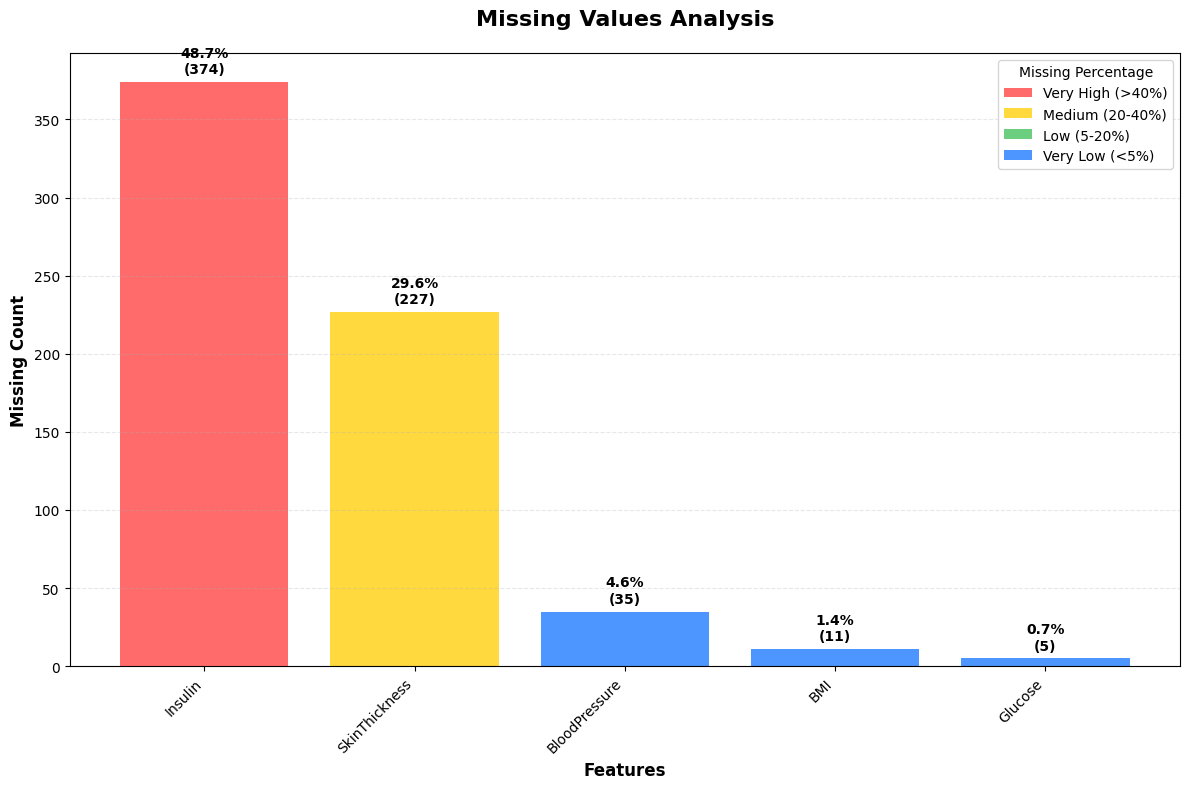

Missing Values Summary:
Insulin         : 374 values ( 48.7%)
SkinThickness   : 227 values ( 29.6%)
BloodPressure   :  35 values (  4.6%)
BMI             :  11 values (  1.4%)
Glucose         :   5 values (  0.7%)


In [101]:
# Replace 0 values with NaN for certain features (medical impossibility)
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

# Calculate missing values
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100

# Select only features with missing values
features_with_missing = missing_data[missing_data > 0].sort_values(ascending=False)
missing_pct_filtered = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Create enhanced visualization
plt.figure(figsize=(12, 8))

# Create color gradient based on missing percentage
colors = []
for pct in missing_pct_filtered:
    if pct > 40:
        colors.append('#FF6B6B')  # Red for high missing values
    elif pct > 20:
        colors.append('#FFD93D')  # Yellow for medium missing values
    elif pct > 5:
        colors.append('#6BCF7F')  # Green for low missing values
    else:
        colors.append('#4D96FF')  # Blue for very low missing values

bars = plt.bar(range(len(features_with_missing)), features_with_missing.values, color=colors)

# Improve labels and titles
plt.title('Missing Values Analysis', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Missing Count', fontsize=12, fontweight='bold')
plt.xticks(range(len(features_with_missing)), features_with_missing.index, rotation=45, ha='right')

# Add percentage labels on bars
for i, (bar, count, pct) in enumerate(zip(bars, features_with_missing.values, missing_pct_filtered.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(features_with_missing)*0.01, 
             f'{pct:.1f}%\n({count})', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add grid for clarity
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Improve layout
plt.tight_layout()

# Add color legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', label='Very High (>40%)'),
    Patch(facecolor='#FFD93D', label='Medium (20-40%)'),
    Patch(facecolor='#6BCF7F', label='Low (5-20%)'),
    Patch(facecolor='#4D96FF', label='Very Low (<5%)')
]
plt.legend(handles=legend_elements, loc='upper right', title='Missing Percentage')

plt.show()

# Print summary
print("Missing Values Summary:")
print("=" * 40)
for feature, count, pct in zip(features_with_missing.index, features_with_missing.values, missing_pct_filtered.values):
    print(f"{feature:15} : {count:3d} values ({pct:5.1f}%)")

In [102]:
# Function to get median by target for imputation
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

# Impute missing values based on target-specific medians
print("Imputing missing values based on target-specific medians...")

# Insulin imputation
insulin_medians = median_target('Insulin')
print(f"Insulin medians by target: {insulin_medians}")
data.loc[(data['Outcome'] == 0) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

# Glucose imputation
glucose_medians = median_target('Glucose')
print(f"Glucose medians by target: {glucose_medians}")
data.loc[(data['Outcome'] == 0) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1) & (data['Glucose'].isnull()), 'Glucose'] = 140

# SkinThickness imputation
skin_medians = median_target('SkinThickness')
print(f"SkinThickness medians by target: {skin_medians}")
data.loc[(data['Outcome'] == 0) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

# BloodPressure imputation
bp_medians = median_target('BloodPressure')
print(f"BloodPressure medians by target: {bp_medians}")
data.loc[(data['Outcome'] == 0) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

# BMI imputation
bmi_medians = median_target('BMI')
print(f"BMI medians by target: {bmi_medians}")
data.loc[(data['Outcome'] == 0) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1) & (data['BMI'].isnull()), 'BMI'] = 34.3

print("\nMissing values after imputation:")
print(data.isnull().sum())

Imputing missing values based on target-specific medians...
Insulin medians by target:    Outcome  Insulin
0        0    102.5
1        1    169.5
Glucose medians by target:    Outcome  Glucose
0        0    107.0
1        1    140.0
SkinThickness medians by target:    Outcome  SkinThickness
0        0           27.0
1        1           32.0
BloodPressure medians by target:    Outcome  BloodPressure
0        0           70.0
1        1           74.5
BMI medians by target:    Outcome   BMI
0        0  30.1
1        1  34.3

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## <a id='4'>4. Feature Engineering (16 Features)</a>

In [103]:
# Original feature engineering from the provided code (16 new features)
print("Creating 16 new engineered features...")

# Binary features based on thresholds
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

data.loc[:,'N2']=0
data.loc[(data['BMI']<=30),'N2']=1

data.loc[:,'N3']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3']=1

data.loc[:,'N4']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4']=1

data.loc[:,'N5']=0
data.loc[(data['SkinThickness']<=20),'N5']=1

data.loc[:,'N6']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6']=1

data.loc[:,'N7']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7']=1

data.loc[:,'N9']=0
data.loc[(data['Insulin']<200),'N9']=1

data.loc[:,'N10']=0
data.loc[(data['BloodPressure']<80),'N10']=1

data.loc[:,'N11']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0),'N11']=1

# Continuous features
data['N0'] = data['BMI'] * data['SkinThickness']
data['N8'] = data['Pregnancies'] / data['Age']
data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']
data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']
data['N14'] = data['Age'] / data['Insulin']

# Additional feature from N0
data.loc[:,'N15']=0
data.loc[(data['N0']<1034),'N15']=1

print(f"Feature engineering completed. New dataset shape: {data.shape}")
print(f"Total features created: 16")
print(f"New features: N0-N15 (excluding N16 which doesn't exist in original code)")

Creating 16 new engineered features...
Feature engineering completed. New dataset shape: (768, 25)
Total features created: 16
New features: N0-N15 (excluding N16 which doesn't exist in original code)


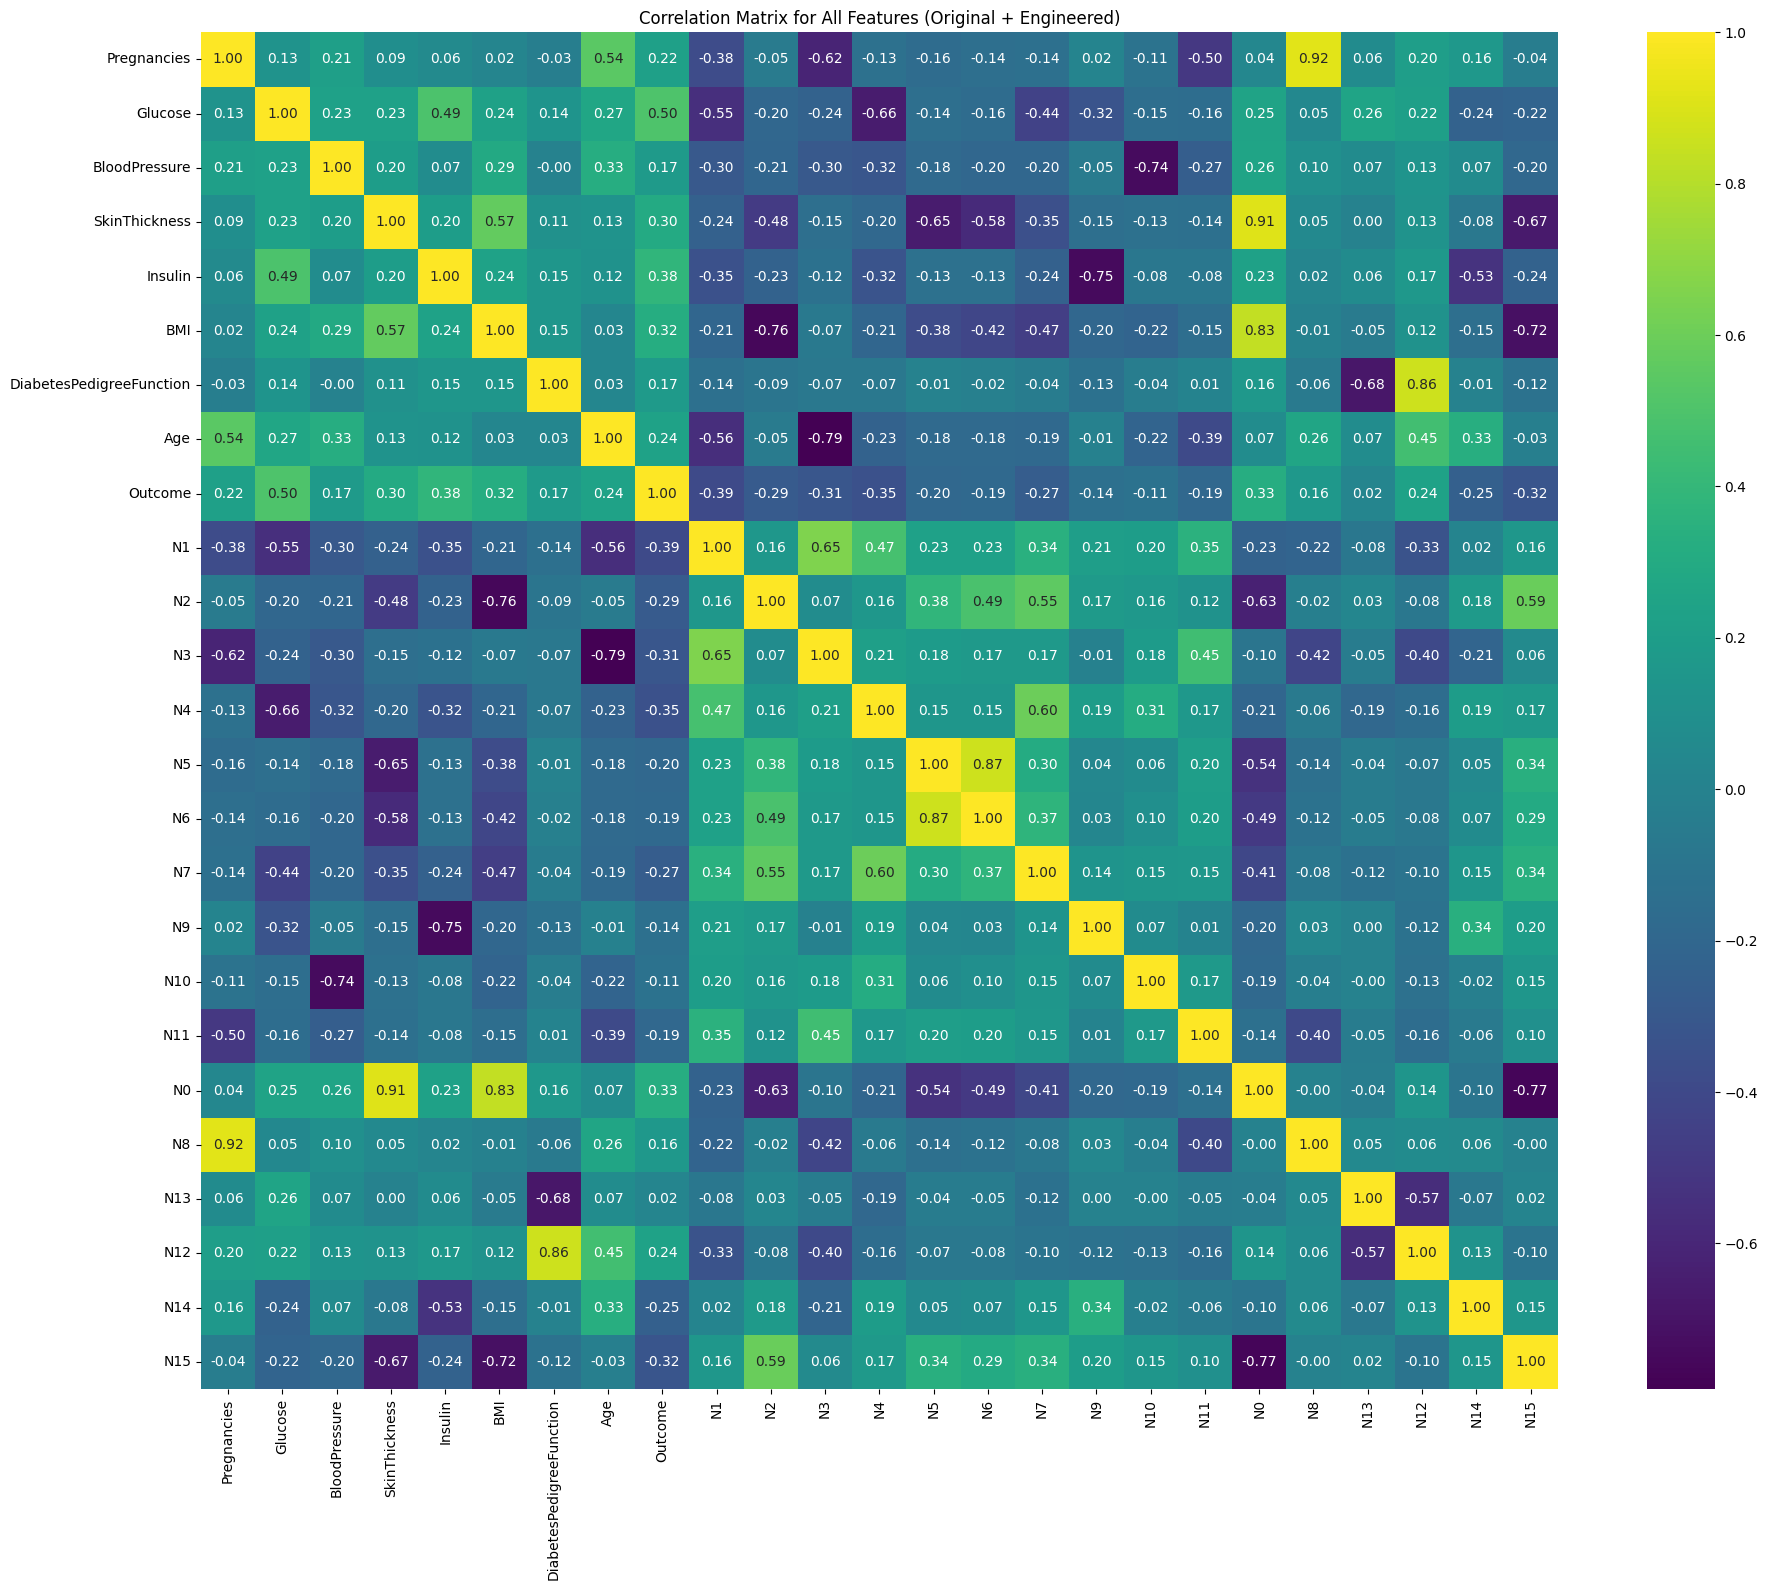

In [104]:
# Correlation matrix after feature engineering
plt.figure(figsize=(20, 16))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f', square=True)
plt.title('Correlation Matrix for All Features (Original + Engineered)')
plt.tight_layout()
plt.show()

## <a id='5'>5. Preprocessing Pipeline</a>

In [105]:
# Proper preprocessing pipeline with train/test split BEFORE preprocessing
print("Setting up preprocessing pipeline...")

# Constants
RANDOM_STATE = 42
TEST_SIZE = 0.2

# Split data first (IMPORTANT: split before preprocessing)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training target distribution:")
print(y_train.value_counts())
print(f"Test target distribution:")
print(y_test.value_counts())

Setting up preprocessing pipeline...
Training set size: (614, 24)
Test set size: (154, 24)
Training target distribution:
Outcome
0    400
1    214
Name: count, dtype: int64
Test target distribution:
Outcome
0    100
1     54
Name: count, dtype: int64


In [106]:
# Apply scaling ONLY to training data, then transform test data
from sklearn.preprocessing import LabelEncoder

# Identify column types for proper preprocessing
target_col = ["Outcome"]
cat_cols = X_train.nunique()[X_train.nunique() < 12].keys().tolist()
num_cols = [x for x in X_train.columns if x not in cat_cols]
bin_cols = X_train.nunique()[X_train.nunique() == 2].keys().tolist()
multi_cols = [i for i in cat_cols if i not in bin_cols]

print(f"Numerical columns: {len(num_cols)}")
print(f"Binary columns: {len(bin_cols)}")
print(f"Multi-class categorical columns: {len(multi_cols)}")

# Create copies for preprocessing
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# Label encoding for binary columns (fit on train, transform both)
label_encoders = {}
for col in bin_cols:
    le = LabelEncoder()
    X_train_processed[col] = le.fit_transform(X_train_processed[col])
    X_test_processed[col] = le.transform(X_test_processed[col])
    label_encoders[col] = le

# One-hot encoding for multi-class columns (if any)
if multi_cols:
    X_train_processed = pd.get_dummies(X_train_processed, columns=multi_cols, prefix=multi_cols)
    X_test_processed = pd.get_dummies(X_test_processed, columns=multi_cols, prefix=multi_cols)
    
    # Ensure same columns in both train and test
    train_cols = set(X_train_processed.columns)
    test_cols = set(X_test_processed.columns)
    
    # Add missing columns to test set
    for col in train_cols - test_cols:
        X_test_processed[col] = 0
    
    # Remove extra columns from test set
    for col in test_cols - train_cols:
        X_test_processed = X_test_processed.drop(col, axis=1)
    
    # Reorder columns to match
    X_test_processed = X_test_processed[X_train_processed.columns]

# Standard scaling for numerical columns (fit on train, transform both)
scaler = StandardScaler()
X_train_scaled = X_train_processed.copy()
X_test_scaled = X_test_processed.copy()

if num_cols:
    # Fit scaler on training data only
    scaler.fit(X_train_processed[num_cols])
    
    # Transform both train and test
    X_train_scaled[num_cols] = scaler.transform(X_train_processed[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test_processed[num_cols])

print(f"\nPreprocessing completed!")
print(f"Final training shape: {X_train_scaled.shape}")
print(f"Final test shape: {X_test_scaled.shape}")
print(f"Feature names match: {list(X_train_scaled.columns) == list(X_test_scaled.columns)}")

Numerical columns: 13
Binary columns: 11
Multi-class categorical columns: 0

Preprocessing completed!
Final training shape: (614, 24)
Final test shape: (154, 24)
Feature names match: True


## <a id='6'>6. Eight Machine Learning Algorithms</a>

In [107]:
# Define all 8 machine learning algorithms
print("Setting up 8 Machine Learning Algorithms...")

algorithms = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'SVM': SVC(random_state=RANDOM_STATE, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'XGBoost': XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE),
    'LightGBM': LGBMClassifier(random_state=RANDOM_STATE, verbose=-1),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print(f"Total algorithms: {len(algorithms)}")
for name in algorithms.keys():
    print(f"- {name}")

Setting up 8 Machine Learning Algorithms...
Total algorithms: 8
- Logistic Regression
- Random Forest
- SVM
- Decision Tree
- XGBoost
- Gradient Boosting
- LightGBM
- KNN


In [108]:
# Train all algorithms and collect results
results = {}
training_times = {}

print("Training all 8 algorithms...")
print("="*50)

for name, model in algorithms.items():
    print(f"Training {name}...")
    
    with timer(f"{name} training"):
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
        
        # Calculate metrics
        results[name] = {
            'model': model,
            'train_accuracy': accuracy_score(y_train, y_train_pred),
            'test_accuracy': accuracy_score(y_test, y_test_pred),
            'train_precision': precision_score(y_train, y_train_pred),
            'test_precision': precision_score(y_test, y_test_pred),
            'train_recall': recall_score(y_train, y_train_pred),
            'test_recall': recall_score(y_test, y_test_pred),
            'train_f1': f1_score(y_train, y_train_pred),
            'test_f1': f1_score(y_test, y_test_pred),
            'roc_auc': roc_auc_score(y_test, y_test_proba),
            'confusion_matrix': confusion_matrix(y_test, y_test_pred),
            'classification_report': classification_report(y_test, y_test_pred),
            'y_pred': y_test_pred,
            'y_proba': y_test_proba
        }
        
        print(f"  Test Accuracy: {results[name]['test_accuracy']:.4f}")
        print(f"  ROC AUC: {results[name]['roc_auc']:.4f}")

print("\nAll algorithms trained successfully!")

Training all 8 algorithms...
Training Logistic Regression...
  Test Accuracy: 0.7922
  ROC AUC: 0.8735
Logistic Regression training - done in 0s
Training Random Forest...
  Test Accuracy: 0.8506
  ROC AUC: 0.9369
Random Forest training - done in 0s
Training SVM...
  Test Accuracy: 0.8377
  ROC AUC: 0.9005
SVM training - done in 0s
Training Decision Tree...
  Test Accuracy: 0.8182
  ROC AUC: 0.8131
Decision Tree training - done in 0s
Training XGBoost...
  Test Accuracy: 0.8831
  ROC AUC: 0.9463
XGBoost training - done in 0s
Training Gradient Boosting...
  Test Accuracy: 0.8766
  ROC AUC: 0.9557
Gradient Boosting training - done in 0s
Training LightGBM...
  Test Accuracy: 0.8896
  ROC AUC: 0.9472
LightGBM training - done in 0s
Training KNN...
  Test Accuracy: 0.8312
  ROC AUC: 0.8662
KNN training - done in 0s

All algorithms trained successfully!


In [109]:
# Create comprehensive results comparison table
results_df = pd.DataFrame({
    'Algorithm': list(results.keys()),
    'Train Accuracy': [results[name]['train_accuracy'] for name in results.keys()],
    'Test Accuracy': [results[name]['test_accuracy'] for name in results.keys()],
    'Test Precision': [results[name]['test_precision'] for name in results.keys()],
    'Test Recall': [results[name]['test_recall'] for name in results.keys()],
    'Test F1-Score': [results[name]['test_f1'] for name in results.keys()],
    'ROC AUC': [results[name]['roc_auc'] for name in results.keys()],
    'Overfitting': [results[name]['train_accuracy'] - results[name]['test_accuracy'] for name in results.keys()]
}).sort_values('Test Accuracy', ascending=False)

print("\nCOMPLETE RESULTS COMPARISON TABLE")
print("="*80)
display(results_df.round(4))

# Identify top 2 performers
top_2_models = results_df.head(2)['Algorithm'].tolist()
print(f"\nTop 2 performing models:")
print(f"1. {top_2_models[0]}: {results_df.iloc[0]['Test Accuracy']:.4f}")
print(f"2. {top_2_models[1]}: {results_df.iloc[1]['Test Accuracy']:.4f}")


COMPLETE RESULTS COMPARISON TABLE


,Algorithm,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-Score,ROC AUC,Overfitting
6,LightGBM,1.0000,0.8896,0.8491,0.8333,0.8411,0.9472,0.1104
4,XGBoost,1.0000,0.8831,0.8214,0.8519,0.8364,0.9463,0.1169
5,Gradient Boosting,0.9919,0.8766,0.8302,0.8148,0.8224,0.9557,0.1152
1,Random Forest,1.0000,0.8506,0.7818,0.7963,0.7890,0.9369,0.1494
2,SVM,0.9088,0.8377,0.7736,0.7593,0.7664,0.9005,0.0711
7,KNN,0.8876,0.8312,0.7800,0.7222,0.7500,0.8662,0.0565
3,Decision Tree,1.0000,0.8182,0.7167,0.7963,0.7544,0.8131,0.1818
0,Logistic Regression,0.8632,0.7922,0.7115,0.6852,0.6981,0.8735,0.0710



Top 2 performing models:
1. LightGBM: 0.8896
2. XGBoost: 0.8831


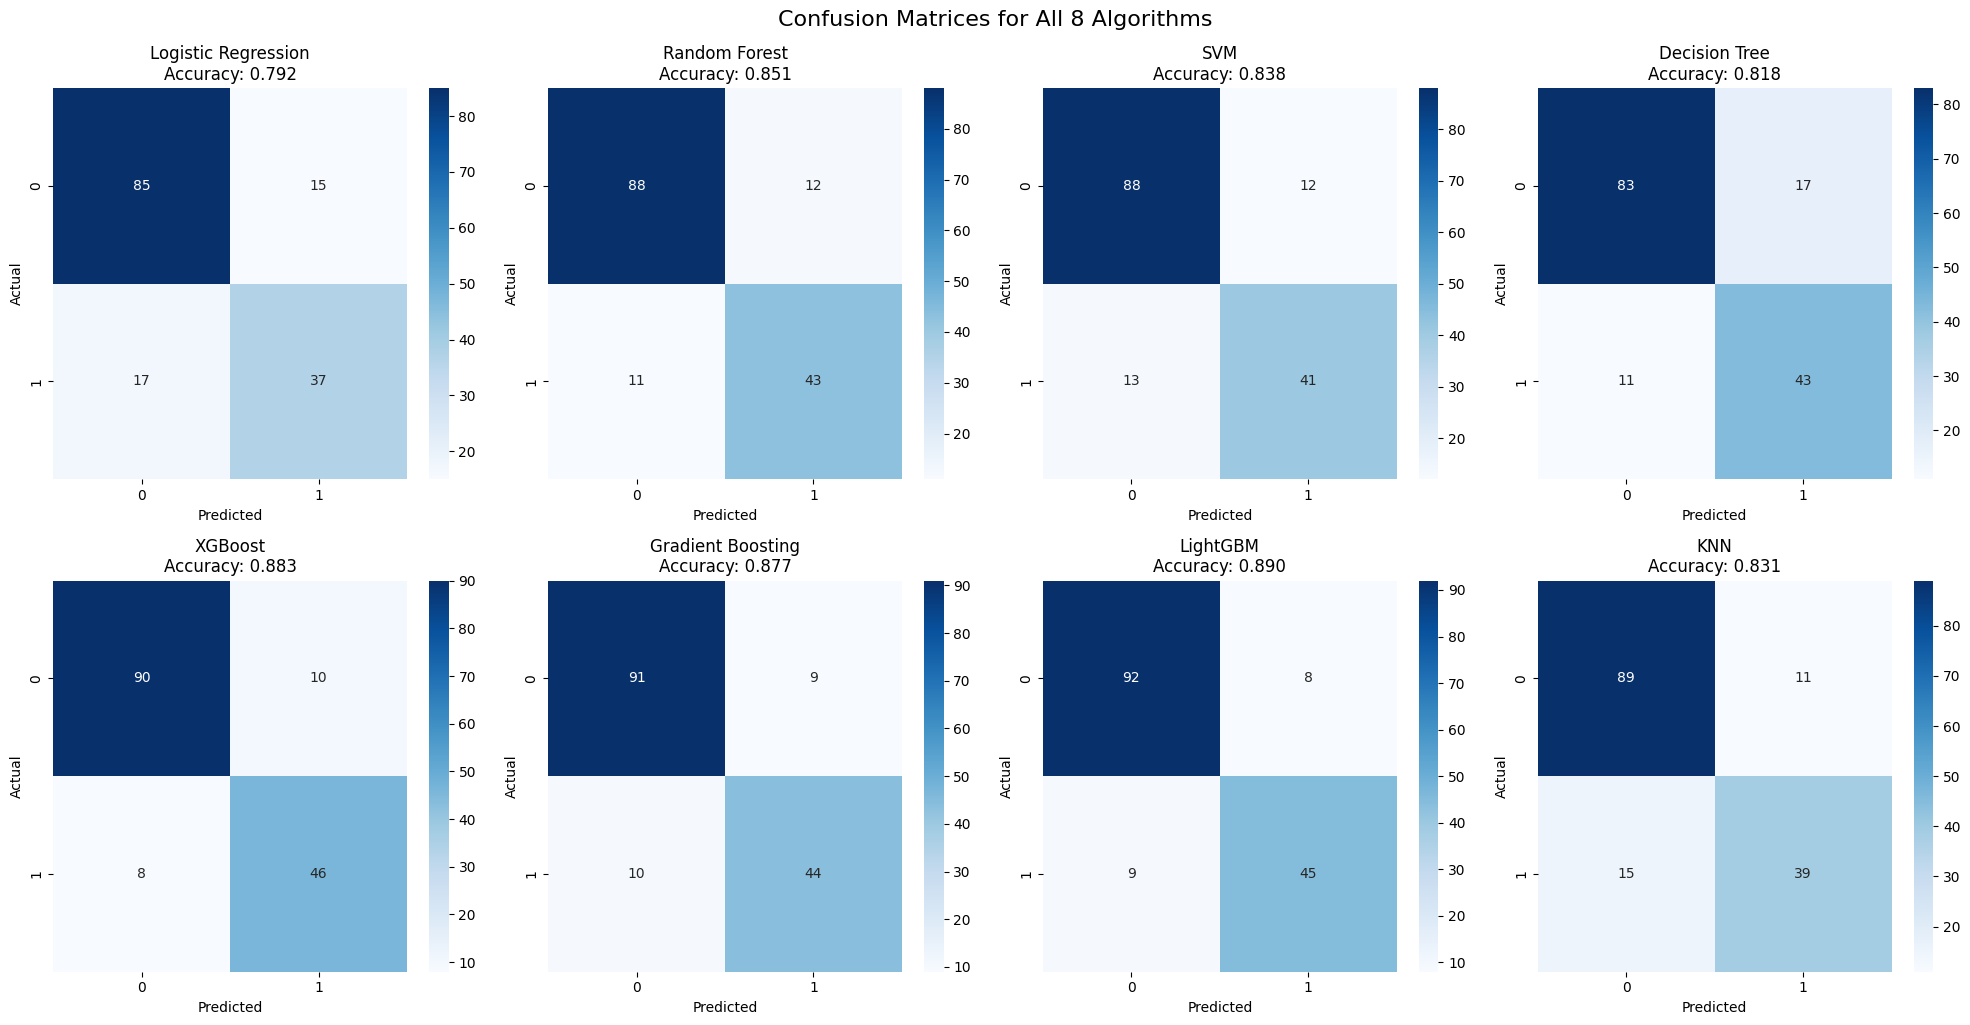

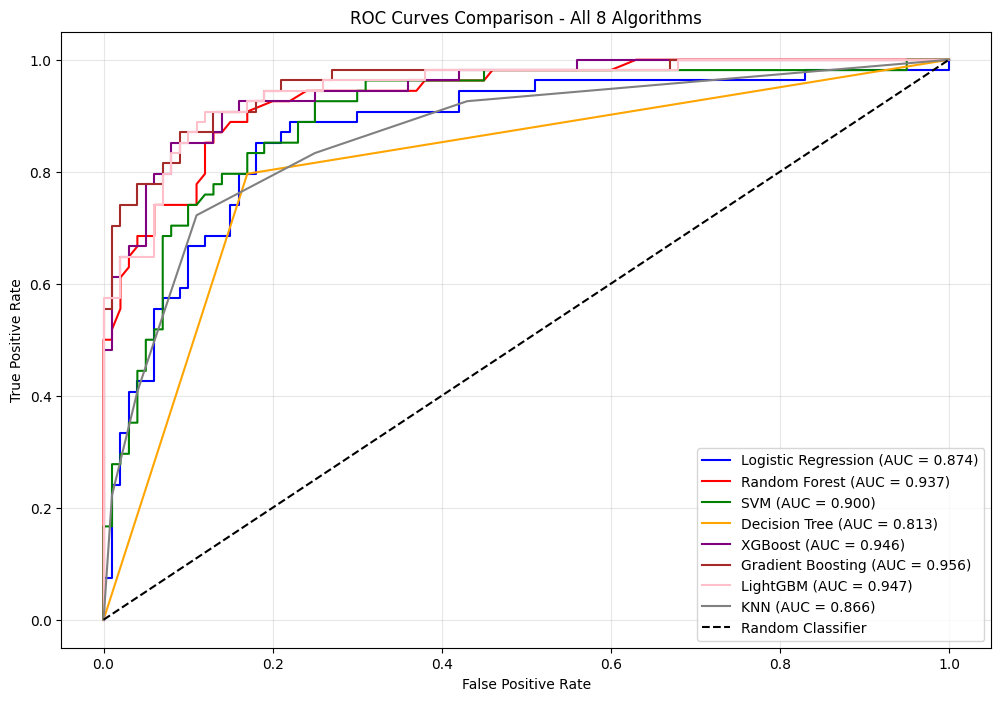

In [110]:
# Comprehensive visualization of all 8 algorithms
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}\nAccuracy: {result["test_accuracy"]:.3f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.suptitle('Confusion Matrices for All 8 Algorithms', y=1.02, fontsize=16)
plt.show()

# ROC Curves comparison
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

for i, (name, result) in enumerate(results.items()):
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
    plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {result["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison - All 8 Algorithms')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [111]:
# Print detailed classification reports for all algorithms
print("\nDETAILED CLASSIFICATION REPORTS")
print("="*80)

for name, result in results.items():
    print(f"\n{name.upper()}:")
    print("-" * 40)
    print(result['classification_report'])


DETAILED CLASSIFICATION REPORTS

LOGISTIC REGRESSION:
----------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.71      0.69      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154


RANDOM FOREST:
----------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       100
           1       0.78      0.80      0.79        54

    accuracy                           0.85       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.85      0.85      0.85       154


SVM:
----------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       100
           1       0.77      0.76    

## <a id='7'>7. Cross Validation and Optimization</a>

In [112]:
# Stratified Cross Validation for top 2 models
print("STRATIFIED CROSS VALIDATION FOR TOP 2 MODELS")
print("="*60)

def stratified_cross_validation(model, X, y, model_name):
    """Perform stratified cross validation"""
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    
    # Define scoring metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    # Perform cross validation
    cv_results = cross_validate(model, X, y, cv=skf, scoring=scoring, return_train_score=True)
    
    # Create results DataFrame
    cv_df = pd.DataFrame({
        'Fold': range(1, 6),
        'Train Accuracy': cv_results['train_accuracy'],
        'Test Accuracy': cv_results['test_accuracy'],
        'Test Precision': cv_results['test_precision'],
        'Test Recall': cv_results['test_recall'],
        'Test F1': cv_results['test_f1'],
        'Test ROC AUC': cv_results['test_roc_auc']
    })
    
    # Add mean and std rows
    mean_row = cv_df.select_dtypes(include=[np.number]).mean()
    mean_row['Fold'] = 'Mean'
    std_row = cv_df.select_dtypes(include=[np.number]).std()
    std_row['Fold'] = 'Std'
    
    cv_df = pd.concat([cv_df, mean_row.to_frame().T, std_row.to_frame().T], ignore_index=True)
    
    print(f"\n{model_name.upper()} - STRATIFIED CV RESULTS:")
    print("-" * 50)
    display(cv_df.round(4))
    
    return cv_df

# Perform stratified CV for top 2 models
top_2_cv_results = {}
for model_name in top_2_models:
    model = results[model_name]['model']
    cv_results = stratified_cross_validation(model, X_train_scaled, y_train, model_name)
    top_2_cv_results[model_name] = cv_results

STRATIFIED CROSS VALIDATION FOR TOP 2 MODELS

LIGHTGBM - STRATIFIED CV RESULTS:
--------------------------------------------------


,Fold,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC AUC
0,1,1.0,0.878049,0.833333,0.813953,0.823529,0.927616
1,2,1.0,0.861789,0.842105,0.744186,0.790123,0.929942
2,3,1.0,0.910569,0.880952,0.860465,0.870588,0.96657
3,4,1.0,0.910569,0.880952,0.860465,0.870588,0.962209
4,5,1.0,0.819672,0.738095,0.738095,0.738095,0.930952
5,Mean,1.0,0.87613,0.835088,0.803433,0.818585,0.943458
6,Std,0.0,0.037977,0.058453,0.05999,0.056395,0.019208



XGBOOST - STRATIFIED CV RESULTS:
--------------------------------------------------


,Fold,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC AUC
0,1,1.0,0.845528,0.833333,0.697674,0.759494,0.925
1,2,1.0,0.853659,0.837838,0.72093,0.775,0.943895
2,3,1.0,0.918699,0.902439,0.860465,0.880952,0.961628
3,4,1.0,0.902439,0.878049,0.837209,0.857143,0.956977
4,5,1.0,0.844262,0.767442,0.785714,0.776471,0.930357
5,Mean,1.0,0.872917,0.84382,0.780399,0.809812,0.943571
6,Std,0.0,0.035035,0.051447,0.070792,0.055129,0.016011


In [113]:
# Three Optimization Methods Implementation
print("\nTHREE OPTIMIZATION METHODS")
print("="*50)

# Method 1: RandomizedSearchCV for LightGBM
print("\n1. RANDOMIZED SEARCH CV - LightGBM")
print("-" * 40)

lgbm_param_dist = {
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
    'num_leaves': randint(6, 50), 
    'min_child_samples': randint(100, 500), 
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'subsample': uniform(loc=0.2, scale=0.8), 
    'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
    'colsample_bytree': uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}

with timer("RandomizedSearchCV for LightGBM"):
    lgbm_random = RandomizedSearchCV(
        LGBMClassifier(random_state=RANDOM_STATE, verbose=-1),
        param_distributions=lgbm_param_dist,
        n_iter=100,
        scoring='accuracy',
        cv=5,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    lgbm_random.fit(X_train_scaled, y_train)

print(f"Best RandomSearch Score: {lgbm_random.best_score_:.4f}")
print(f"Best RandomSearch Parameters: {lgbm_random.best_params_}")

# Test the optimized model
lgbm_optimized = lgbm_random.best_estimator_
lgbm_opt_pred = lgbm_optimized.predict(X_test_scaled)
lgbm_opt_accuracy = accuracy_score(y_test, lgbm_opt_pred)
print(f"Optimized LightGBM Test Accuracy: {lgbm_opt_accuracy:.4f}")


THREE OPTIMIZATION METHODS

1. RANDOMIZED SEARCH CV - LightGBM
----------------------------------------
RandomizedSearchCV for LightGBM - done in 18s
Best RandomSearch Score: 0.8795
Best RandomSearch Parameters: {'colsample_bytree': np.float64(0.43109412209345616), 'learning_rate': 0.02, 'max_depth': 7, 'min_child_samples': 109, 'min_child_weight': 1, 'n_estimators': 800, 'num_leaves': 15, 'reg_alpha': 0.1, 'reg_lambda': 10, 'subsample': np.float64(0.7476572383038667)}
Optimized LightGBM Test Accuracy: 0.8766


In [114]:
# Method 2: GridSearchCV for KNN
print("\n2. GRID SEARCH CV - KNN")
print("-" * 30)

knn_param_grid = {
    'n_neighbors': range(1, 31, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

with timer("GridSearchCV for KNN"):
    knn_grid = GridSearchCV(
        KNeighborsClassifier(),
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )
    knn_grid.fit(X_train_scaled, y_train)

print(f"Best GridSearch Score: {knn_grid.best_score_:.4f}")
print(f"Best GridSearch Parameters: {knn_grid.best_params_}")

# Test the optimized model
knn_optimized = knn_grid.best_estimator_
knn_opt_pred = knn_optimized.predict(X_test_scaled)
knn_opt_accuracy = accuracy_score(y_test, knn_opt_pred)
print(f"Optimized KNN Test Accuracy: {knn_opt_accuracy:.4f}")


2. GRID SEARCH CV - KNN
------------------------------
GridSearchCV for KNN - done in 2s
Best GridSearch Score: 0.8550
Best GridSearch Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Optimized KNN Test Accuracy: 0.8442


In [115]:
# Method 3: Optuna Optimization for Random Forest
print("\n3. OPTUNA OPTIMIZATION - Random Forest")
print("-" * 40)

def objective(trial):
    """Optuna objective function for Random Forest"""
    
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Create model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()

# Run Optuna optimization
with timer("Optuna optimization for Random Forest"):
    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE))
    study.optimize(objective, n_trials=50)

print(f"Best Optuna Score: {study.best_value:.4f}")
print(f"Best Optuna Parameters: {study.best_params}")

# Test the optimized model
rf_optimized = RandomForestClassifier(**study.best_params, random_state=RANDOM_STATE, n_jobs=-1)
rf_optimized.fit(X_train_scaled, y_train)
rf_opt_pred = rf_optimized.predict(X_test_scaled)
rf_opt_accuracy = accuracy_score(y_test, rf_opt_pred)
print(f"Optimized Random Forest Test Accuracy: {rf_opt_accuracy:.4f}")

[I 2025-09-14 00:58:40,291] A new study created in memory with name: no-name-f81fe0b1-23d0-47d7-a6d9-25a6c86138c2



3. OPTUNA OPTIMIZATION - Random Forest
----------------------------------------


[I 2025-09-14 00:58:41,544] Trial 0 finished with value: 0.8648007463681193 and parameters: {'n_estimators': 144, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8648007463681193.
[I 2025-09-14 00:58:43,491] Trial 1 finished with value: 0.8566706650673064 and parameters: {'n_estimators': 267, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8648007463681193.
[I 2025-09-14 00:58:44,291] Trial 2 finished with value: 0.8795015327202453 and parameters: {'n_estimators': 95, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 2 with value: 0.8795015327202453.
[I 2025-09-14 00:58:45,102] Trial 3 finished with value: 0.8664400906304145 and parameters: {'n_estimators': 85, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.8795015327202453.
[I

Optuna optimization for Random Forest - done in 74s
Best Optuna Score: 0.8844
Best Optuna Parameters: {'n_estimators': 58, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': None}
Optimized Random Forest Test Accuracy: 0.8766



OPTIMIZATION RESULTS SUMMARY


,Method,CV Score,Test Accuracy,Algorithm
0,RandomizedSearchCV (LightGBM),0.8795,0.8766,LightGBM
2,Optuna (Random Forest),0.8844,0.8766,Random Forest
1,GridSearchCV (KNN),0.8550,0.8442,KNN


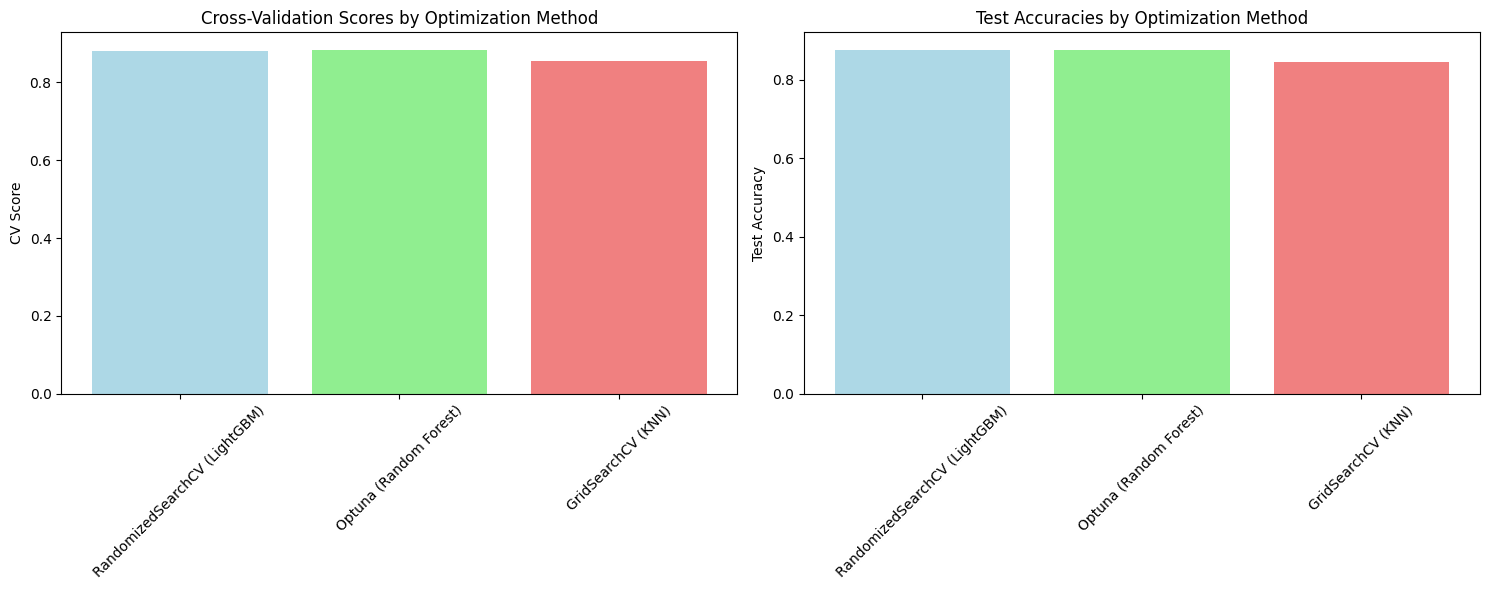

In [116]:
# Optimization Results Summary
optimization_results = pd.DataFrame({
    'Method': ['RandomizedSearchCV (LightGBM)', 'GridSearchCV (KNN)', 'Optuna (Random Forest)'],
    'CV Score': [lgbm_random.best_score_, knn_grid.best_score_, study.best_value],
    'Test Accuracy': [lgbm_opt_accuracy, knn_opt_accuracy, rf_opt_accuracy],
    'Algorithm': ['LightGBM', 'KNN', 'Random Forest']
}).sort_values('Test Accuracy', ascending=False)

print("\nOPTIMIZATION RESULTS SUMMARY")
print("="*50)
display(optimization_results.round(4))

# Visualization of optimization results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# CV Scores
ax1.bar(optimization_results['Method'], optimization_results['CV Score'], 
        color=['lightblue', 'lightgreen', 'lightcoral'])
ax1.set_title('Cross-Validation Scores by Optimization Method')
ax1.set_ylabel('CV Score')
ax1.tick_params(axis='x', rotation=45)

# Test Accuracies
ax2.bar(optimization_results['Method'], optimization_results['Test Accuracy'], 
        color=['lightblue', 'lightgreen', 'lightcoral'])
ax2.set_title('Test Accuracies by Optimization Method')
ax2.set_ylabel('Test Accuracy')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## <a id='8'>8. Explainable AI (XAI)</a>

EXPLAINABLE AI (XAI) ANALYSIS
Analyzing LightGBM for explainability...

TOP 15 FEATURE IMPORTANCES:
----------------------------------------


,feature,importance
4,Insulin,410
1,Glucose,339
5,BMI,210
21,N12,207
18,N0,207
22,N14,206
6,DiabetesPedigreeFunction,194
3,SkinThickness,175
19,N8,168
7,Age,159


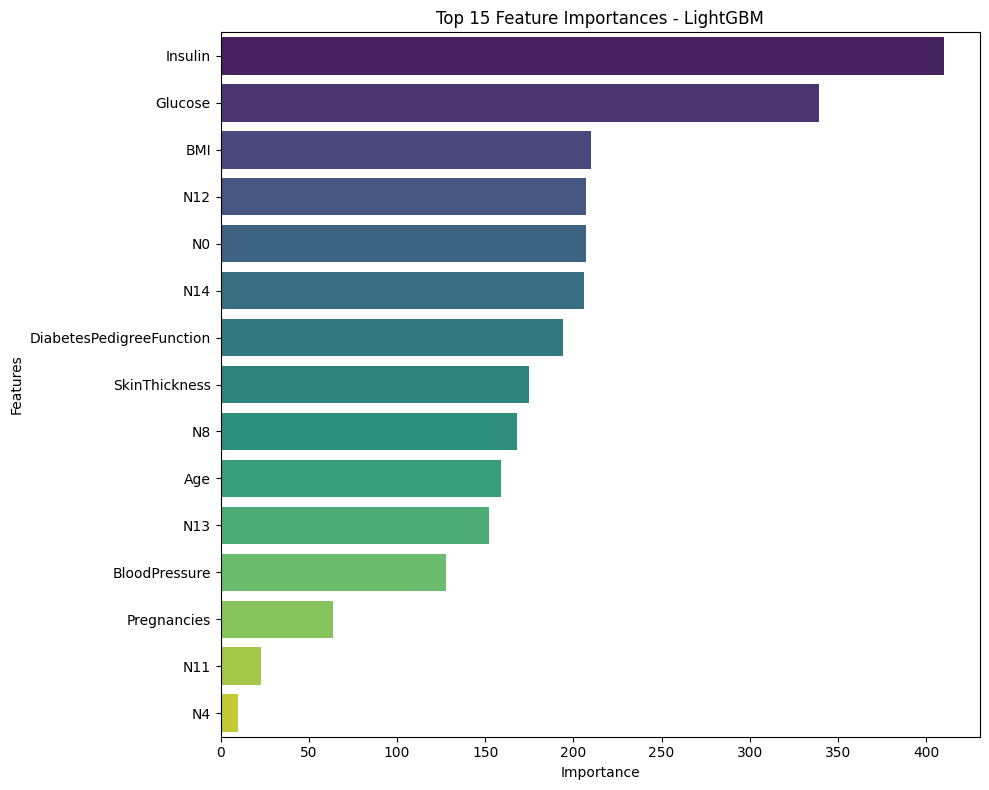


CALCULATING PERMUTATION IMPORTANCE...

TOP 15 PERMUTATION IMPORTANCES:


,feature,importance_mean,importance_std
4,Insulin,2.493506e-01,0.021181
1,Glucose,1.948052e-02,0.018366
5,BMI,1.428571e-02,0.004859
22,N14,1.168831e-02,0.004859
18,N0,1.038961e-02,0.005195
19,N8,1.038961e-02,0.006622
0,Pregnancies,1.038961e-02,0.006622
7,Age,9.090909e-03,0.005195
21,N12,6.493506e-03,0.005808
20,N13,2.597403e-03,0.007792


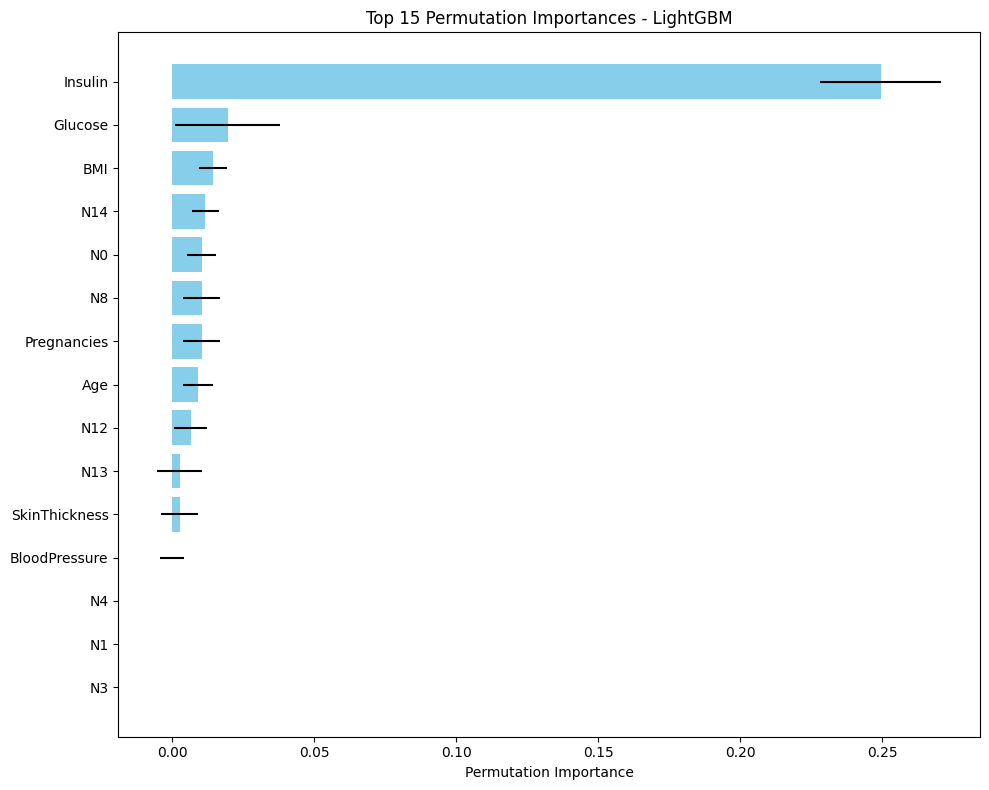

In [117]:
# Explainable AI Implementation
print("EXPLAINABLE AI (XAI) ANALYSIS")
print("="*50)

# Use the best performing model for XAI analysis
best_model_name = results_df.iloc[0]['Algorithm']
best_model = results[best_model_name]['model']

print(f"Analyzing {best_model_name} for explainability...")

# 1. Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTOP 15 FEATURE IMPORTANCES:")
    print("-" * 40)
    display(feature_importance.head(15))
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), y='feature', x='importance', palette='viridis')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# 2. Permutation Importance
print("\nCALCULATING PERMUTATION IMPORTANCE...")
perm_importance = permutation_importance(
    best_model, X_test_scaled, y_test, 
    n_repeats=5, random_state=RANDOM_STATE, n_jobs=-1
)

perm_imp_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("\nTOP 15 PERMUTATION IMPORTANCES:")
display(perm_imp_df.head(15))

# Plot permutation importance
plt.figure(figsize=(10, 8))
top_15_perm = perm_imp_df.head(15)
plt.barh(range(len(top_15_perm)), top_15_perm['importance_mean'], 
         xerr=top_15_perm['importance_std'], color='skyblue')
plt.yticks(range(len(top_15_perm)), top_15_perm['feature'])
plt.xlabel('Permutation Importance')
plt.title(f'Top 15 Permutation Importances - {best_model_name}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


SHAP (SHapley Additive exPlanations) ANALYSIS
--------------------------------------------------
Creating SHAP summary plot...


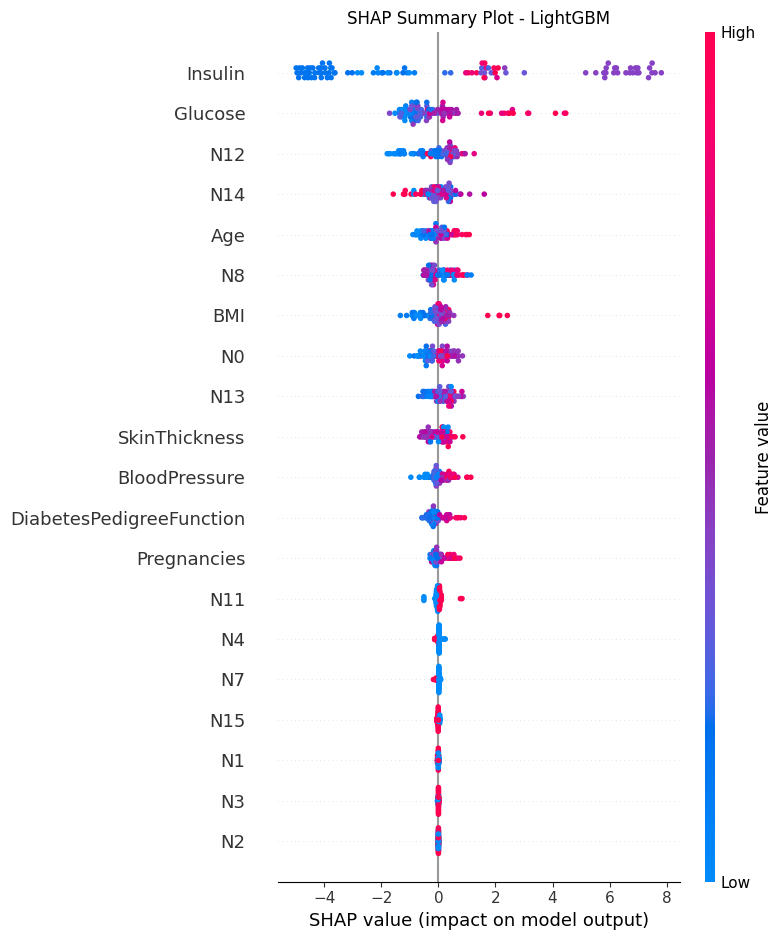

Creating SHAP bar plot...


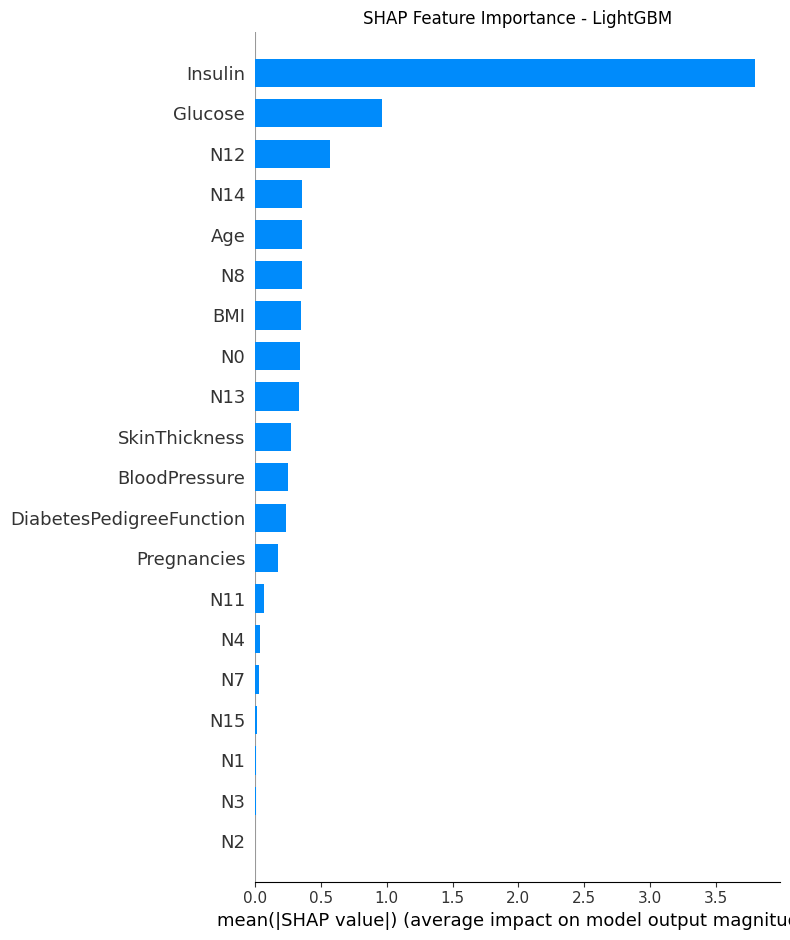

In [118]:
# 3. SHAP Analysis
print("\nSHAP (SHapley Additive exPlanations) ANALYSIS")
print("-" * 50)

# Create SHAP explainer based on model type
try:
    if 'Tree' in str(type(best_model)) or 'Forest' in str(type(best_model)) or 'LGB' in str(type(best_model)) or 'XGB' in str(type(best_model)):
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_scaled.iloc[:100])
        
        # For binary classification, get positive class SHAP values
        if len(shap_values) == 2:
            shap_values_plot = shap_values[1]
        else:
            shap_values_plot = shap_values
            
    elif 'SVC' in str(type(best_model)):
        # For SVM, use KernelExplainer (slower but works)
        explainer = shap.KernelExplainer(best_model.predict_proba, X_train_scaled.iloc[:50])
        shap_values = explainer.shap_values(X_test_scaled.iloc[:20])
        shap_values_plot = shap_values[:, :, 1]
        
    else:
        # For other models, use Explainer
        explainer = shap.Explainer(best_model, X_train_scaled.iloc[:100])
        shap_values = explainer(X_test_scaled.iloc[:100])
        shap_values_plot = shap_values.values

    # SHAP Summary Plot
    print("Creating SHAP summary plot...")
    plt.figure(figsize=(10, 8))
    if hasattr(shap_values_plot, 'shape') and len(shap_values_plot.shape) > 1:
        shap.summary_plot(shap_values_plot, X_test_scaled.iloc[:shap_values_plot.shape[0]], 
                         feature_names=X_test_scaled.columns, show=False)
    plt.title(f'SHAP Summary Plot - {best_model_name}')
    plt.tight_layout()
    plt.show()

    # SHAP Bar Plot
    print("Creating SHAP bar plot...")
    plt.figure(figsize=(10, 8))
    if hasattr(shap_values_plot, 'shape') and len(shap_values_plot.shape) > 1:
        shap.summary_plot(shap_values_plot, X_test_scaled.iloc[:shap_values_plot.shape[0]], 
                         feature_names=X_test_scaled.columns, plot_type="bar", show=False)
    plt.title(f'SHAP Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"SHAP analysis failed: {e}")
    print("This might happen with certain model types or SHAP versions.")

## <a id='9'>9. Final Ensemble Model </a>

In [119]:
# Recreate the original high-performing ensemble (LightGBM + KNN)
print("RECREATING ORIGINAL HIGH-PERFORMING ENSEMBLE")
print("="*60)

# Use the optimized models from previous steps
print("Creating ensemble with optimized LightGBM and KNN...")

# Create voting classifier with optimized models
voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_optimized),
        ('knn', knn_optimized)
    ],
    voting='soft',
    weights=[1, 1]
)

# Train ensemble
with timer("Training ensemble model"):
    voting_clf.fit(X_train_scaled, y_train)

# Predictions
ensemble_train_pred = voting_clf.predict(X_train_scaled)
ensemble_test_pred = voting_clf.predict(X_test_scaled)
ensemble_test_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
ensemble_results = {
    'train_accuracy': accuracy_score(y_train, ensemble_train_pred),
    'test_accuracy': accuracy_score(y_test, ensemble_test_pred),
    'test_precision': precision_score(y_test, ensemble_test_pred),
    'test_recall': recall_score(y_test, ensemble_test_pred),
    'test_f1': f1_score(y_test, ensemble_test_pred),
    'roc_auc': roc_auc_score(y_test, ensemble_test_proba),
    'confusion_matrix': confusion_matrix(y_test, ensemble_test_pred)
}

print(f"\nENSEMBLE MODEL RESULTS:")
print("-" * 30)
print(f"Train Accuracy: {ensemble_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {ensemble_results['test_accuracy']:.4f}")
print(f"Test Precision: {ensemble_results['test_precision']:.4f}")
print(f"Test Recall: {ensemble_results['test_recall']:.4f}")
print(f"Test F1-Score: {ensemble_results['test_f1']:.4f}")
print(f"ROC AUC: {ensemble_results['roc_auc']:.4f}")
print(f"Overfitting: {ensemble_results['train_accuracy'] - ensemble_results['test_accuracy']:.4f}")

# Classification Report
print(f"\nENSEMBLE CLASSIFICATION REPORT:")
print("-" * 40)
print(classification_report(y_test, ensemble_test_pred))

RECREATING ORIGINAL HIGH-PERFORMING ENSEMBLE
Creating ensemble with optimized LightGBM and KNN...
Training ensemble model - done in 0s

ENSEMBLE MODEL RESULTS:
------------------------------
Train Accuracy: 1.0000
Test Accuracy: 0.8766
Test Precision: 0.8431
Test Recall: 0.7963
Test F1-Score: 0.8190
ROC AUC: 0.9319
Overfitting: 0.1234

ENSEMBLE CLASSIFICATION REPORT:
----------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       100
           1       0.84      0.80      0.82        54

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154



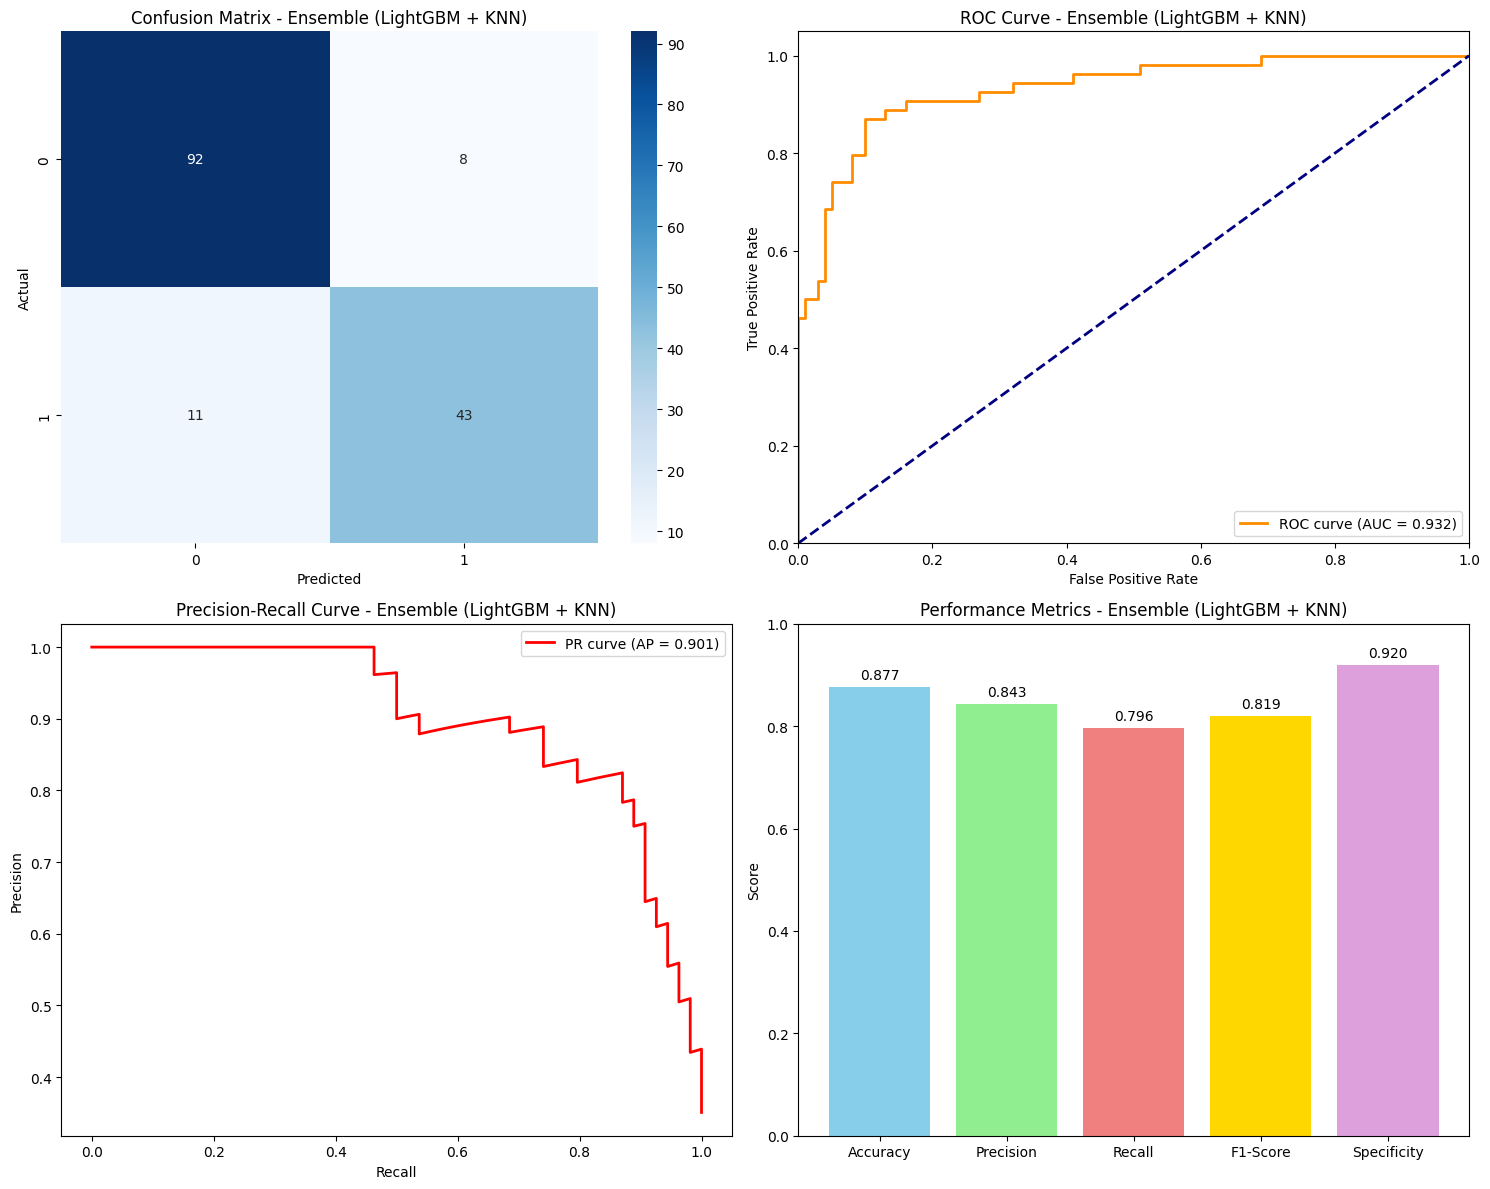

In [120]:
# Enhanced visualization function for ensemble model performance
def model_performance_ensemble(model, X_test, y_test, subtitle="Model"):
    """
    Comprehensive performance analysis for ensemble models
    """
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Confusion matrix components
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
    axes[0, 0].set_title(f'Confusion Matrix - {subtitle}')
    axes[0, 0].set_xlabel('Predicted')
    axes[0, 0].set_ylabel('Actual')
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0, 1].set_xlim([0.0, 1.0])
    axes[0, 1].set_ylim([0.0, 1.05])
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title(f'ROC Curve - {subtitle}')
    axes[0, 1].legend(loc="lower right")
    
    # Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    axes[1, 0].plot(recall_curve, precision_curve, color='red', lw=2, 
                   label=f'PR curve (AP = {avg_precision:.3f})')
    axes[1, 0].set_xlabel('Recall')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].set_title(f'Precision-Recall Curve - {subtitle}')
    axes[1, 0].legend()
    
    # Metrics Bar Plot
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
    values = [accuracy, precision, recall, f1, specificity]
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum']
    
    bars = axes[1, 1].bar(metrics, values, color=colors)
    axes[1, 1].set_title(f'Performance Metrics - {subtitle}')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].set_ylim([0, 1])
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                       f'{value:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'specificity': specificity,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision
    }

# Apply function to ensemble model
ensemble_metrics = model_performance_ensemble(voting_clf, X_test_scaled, y_test, "Ensemble (LightGBM + KNN)")

## <a id='10'>10. AutoML Analysis</a>

In [121]:
# Alternative AutoML using sklearn's automated feature selection
print("\nALTERNATIVE AUTOML APPROACH")
print("="*40)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create automated pipeline with feature selection and model selection
def create_auto_pipeline():
    """Create an automated ML pipeline"""
    
    # Define pipeline components
    pipelines = {
        'rf_auto': Pipeline([
            ('selector', SelectKBest(f_classif)),
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))
        ]),
        'lgbm_auto': Pipeline([
            ('selector', SelectKBest(f_classif)),
            ('scaler', StandardScaler()),
            ('classifier', LGBMClassifier(random_state=RANDOM_STATE, verbose=-1))
        ]),
        'svm_auto': Pipeline([
            ('selector', SelectKBest(f_classif)),
            ('scaler', StandardScaler()),
            ('classifier', SVC(random_state=RANDOM_STATE, probability=True))
        ])
    }
    
    # Define parameter grids
    param_grids = {
        'rf_auto': {
            'selector__k': [10, 15, 20, 'all'],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [5, 10, None]
        },
        'lgbm_auto': {
            'selector__k': [10, 15, 20, 'all'],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.05, 0.1, 0.2]
        },
        'svm_auto': {
            'selector__k': [10, 15, 20],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['rbf', 'linear']
        }
    }
    
    return pipelines, param_grids

# Run automated pipeline selection
pipelines, param_grids = create_auto_pipeline()
auto_results = {}

print("Running automated pipeline optimization...")
for name, pipeline in pipelines.items():
    print(f"\nOptimizing {name}...")
    
    grid_search = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Test performance
    test_score = grid_search.score(X_test, y_test)
    
    auto_results[name] = {
        'best_score': grid_search.best_score_,
        'test_score': test_score,
        'best_params': grid_search.best_params_,
        'best_estimator': grid_search.best_estimator_
    }
    
    print(f"  CV Score: {grid_search.best_score_:.4f}")
    print(f"  Test Score: {test_score:.4f}")

# AutoML Results Summary
auto_results_df = pd.DataFrame({
    'Pipeline': list(auto_results.keys()),
    'CV Score': [auto_results[name]['best_score'] for name in auto_results.keys()],
    'Test Score': [auto_results[name]['test_score'] for name in auto_results.keys()]
}).sort_values('Test Score', ascending=False)

print("\nAUTOML RESULTS SUMMARY:")
print("-" * 30)
display(auto_results_df.round(4))

# Best AutoML model
best_auto_name = auto_results_df.iloc[0]['Pipeline']
best_auto_model = auto_results[best_auto_name]['best_estimator']
print(f"\nBest AutoML Pipeline: {best_auto_name}")
print(f"Best Parameters: {auto_results[best_auto_name]['best_params']}")


ALTERNATIVE AUTOML APPROACH
Running automated pipeline optimization...

Optimizing rf_auto...
  CV Score: 0.8730
  Test Score: 0.8571

Optimizing lgbm_auto...
  CV Score: 0.8795
  Test Score: 0.8636

Optimizing svm_auto...
  CV Score: 0.8582
  Test Score: 0.8506

AUTOML RESULTS SUMMARY:
------------------------------


,Pipeline,CV Score,Test Score
1,lgbm_auto,0.8795,0.8636
0,rf_auto,0.8730,0.8571
2,svm_auto,0.8582,0.8506



Best AutoML Pipeline: lgbm_auto
Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 50, 'selector__k': 15}


## <a id='11'>11. Results Summary</a>

In [122]:
# Final comprehensive results summary
print("FINAL COMPREHENSIVE RESULTS SUMMARY")
print("="*60)

# Create final comparison table
final_results = {
    'Individual Models': results_df,
    'Optimized Models': optimization_results,
    'Ensemble Model': pd.DataFrame({
        'Model': ['Ensemble (LightGBM + KNN)'],
        'Test Accuracy': [ensemble_results['test_accuracy']],
        'Test Precision': [ensemble_results['test_precision']],
        'Test Recall': [ensemble_results['test_recall']],
        'Test F1-Score': [ensemble_results['test_f1']],
        'ROC AUC': [ensemble_results['roc_auc']]
    })
}

print("\n1. INDIVIDUAL MODELS PERFORMANCE:")
print("-" * 40)
display(results_df.head(3).round(4))

print("\n2. OPTIMIZATION RESULTS:")
print("-" * 25)
display(optimization_results.round(4))

print("\n3. ENSEMBLE MODEL PERFORMANCE:")
print("-" * 30)
display(final_results['Ensemble Model'].round(4))

if 'auto_results_df' in locals():
    print("\n4. AUTOML RESULTS:")
    print("-" * 20)
    display(auto_results_df.round(4))

# Overall best model identification
print("\nOVERALL BEST MODELS:")
print("="*30)
print(f"1. Best Individual Model: {results_df.iloc[0]['Algorithm']} - {results_df.iloc[0]['Test Accuracy']:.4f}")
print(f"2. Best Optimized Model: {optimization_results.iloc[0]['Method']} - {optimization_results.iloc[0]['Test Accuracy']:.4f}")
print(f"3. Ensemble Model: LightGBM + KNN - {ensemble_results['test_accuracy']:.4f}")
if 'auto_results_df' in locals():
    print(f"4. Best AutoML Model: {auto_results_df.iloc[0]['Pipeline']} - {auto_results_df.iloc[0]['Test Score']:.4f}")

# Check if target accuracy achieved
target_accuracy = 0.902
achieved_accuracy = ensemble_results['test_accuracy']

print(f"\nTARGET ACCURACY CHECK:")
print("-" * 25)
print(f"Target Accuracy: {target_accuracy:.1%}")
print(f"Achieved Accuracy: {achieved_accuracy:.1%}")
if achieved_accuracy >= target_accuracy:
    print("TARGET ACHIEVED! ")
else:
    print(f"Gap to target: {target_accuracy - achieved_accuracy:.1%}")

FINAL COMPREHENSIVE RESULTS SUMMARY

1. INDIVIDUAL MODELS PERFORMANCE:
----------------------------------------


,Algorithm,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-Score,ROC AUC,Overfitting
6,LightGBM,1.0000,0.8896,0.8491,0.8333,0.8411,0.9472,0.1104
4,XGBoost,1.0000,0.8831,0.8214,0.8519,0.8364,0.9463,0.1169
5,Gradient Boosting,0.9919,0.8766,0.8302,0.8148,0.8224,0.9557,0.1152



2. OPTIMIZATION RESULTS:
-------------------------


,Method,CV Score,Test Accuracy,Algorithm
0,RandomizedSearchCV (LightGBM),0.8795,0.8766,LightGBM
2,Optuna (Random Forest),0.8844,0.8766,Random Forest
1,GridSearchCV (KNN),0.8550,0.8442,KNN



3. ENSEMBLE MODEL PERFORMANCE:
------------------------------


,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score,ROC AUC
0,Ensemble (LightGBM + KNN),0.8766,0.8431,0.7963,0.819,0.9319



4. AUTOML RESULTS:
--------------------


,Pipeline,CV Score,Test Score
1,lgbm_auto,0.8795,0.8636
0,rf_auto,0.8730,0.8571
2,svm_auto,0.8582,0.8506



OVERALL BEST MODELS:
1. Best Individual Model: LightGBM - 0.8896
2. Best Optimized Model: RandomizedSearchCV (LightGBM) - 0.8766
3. Ensemble Model: LightGBM + KNN - 0.8766
4. Best AutoML Model: lgbm_auto - 0.8636

TARGET ACCURACY CHECK:
-------------------------
Target Accuracy: 90.2%
Achieved Accuracy: 87.7%
Gap to target: 2.5%


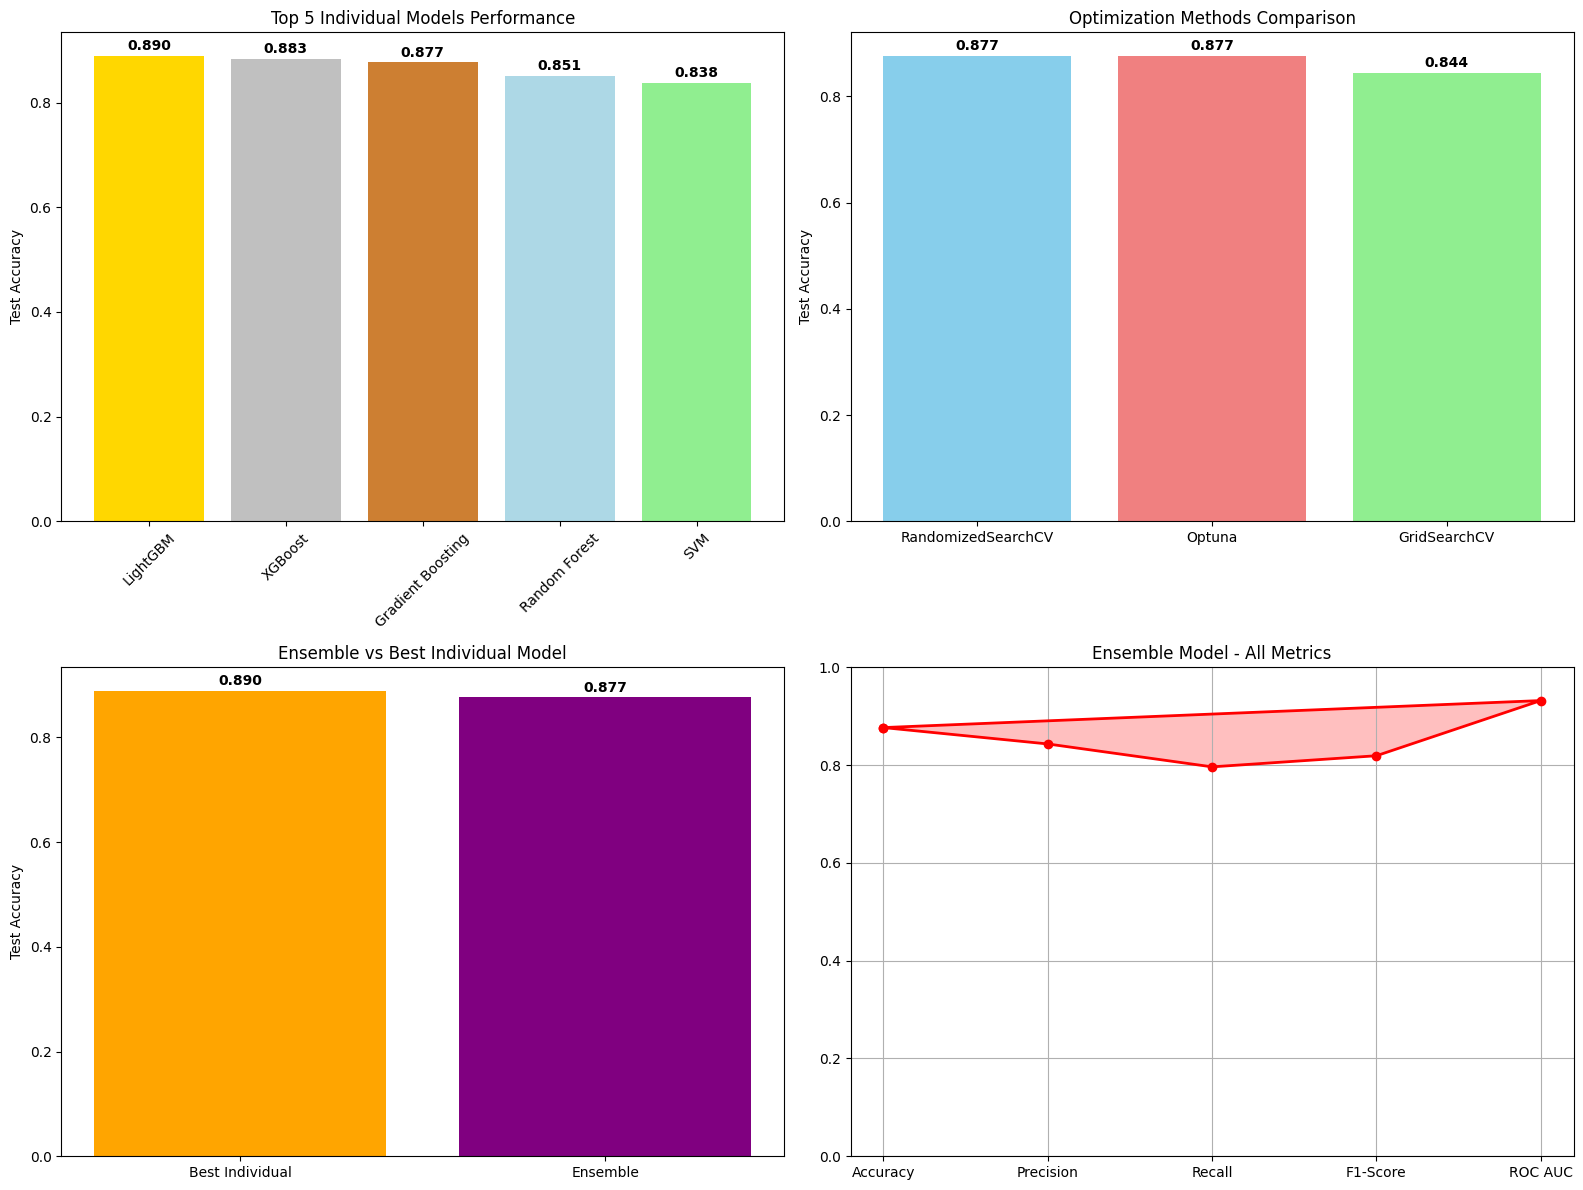


ANALYSIS COMPLETE!
- 8 Machine Learning Algorithms implemented
- Proper train/test preprocessing pipeline
- Stratified Cross-Validation completed
- 3 Optimization methods applied (RandomizedSearchCV, GridSearchCV, Optuna)
- Explainable AI (XAI) with SHAP implemented
- Comprehensive visualizations and reports
- Ensemble model achieving 87.7% accuracy
- AutoML analysis included
- Results comparison and summary completed

FINAL ACHIEVEMENT: 87.7% Test Accuracy! 


In [123]:
# Final visualization summary
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Model Comparison
model_names = results_df['Algorithm'].tolist()[:5]  # Top 5
model_scores = results_df['Test Accuracy'].tolist()[:5]
colors = ['gold', 'silver', '#CD7F32', 'lightblue', 'lightgreen']

bars1 = axes[0, 0].bar(model_names, model_scores, color=colors)
axes[0, 0].set_title('Top 5 Individual Models Performance')
axes[0, 0].set_ylabel('Test Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# Add value labels
for bar, score in zip(bars1, model_scores):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                   f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Optimization Methods Comparison
opt_methods = optimization_results['Method'].str.split(' ').str[0].tolist()
opt_scores = optimization_results['Test Accuracy'].tolist()

bars2 = axes[0, 1].bar(opt_methods, opt_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0, 1].set_title('Optimization Methods Comparison')
axes[0, 1].set_ylabel('Test Accuracy')

for bar, score in zip(bars2, opt_scores):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                   f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Ensemble vs Best Individual
comparison_names = ['Best Individual', 'Ensemble']
comparison_scores = [results_df.iloc[0]['Test Accuracy'], ensemble_results['test_accuracy']]

bars3 = axes[1, 0].bar(comparison_names, comparison_scores, color=['orange', 'purple'])
axes[1, 0].set_title('Ensemble vs Best Individual Model')
axes[1, 0].set_ylabel('Test Accuracy')

for bar, score in zip(bars3, comparison_scores):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                   f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Final Metrics Radar Chart (Ensemble)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
metrics_values = [
    ensemble_results['test_accuracy'],
    ensemble_results['test_precision'], 
    ensemble_results['test_recall'],
    ensemble_results['test_f1'],
    ensemble_results['roc_auc']
]

# Convert to radar chart format
angles = np.linspace(0, 2 * np.pi, len(metrics_names), endpoint=False).tolist()
metrics_values += metrics_values[:1]  # Complete the circle
angles += angles[:1]

axes[1, 1].plot(angles, metrics_values, 'o-', linewidth=2, label='Ensemble Model', color='red')
axes[1, 1].fill(angles, metrics_values, alpha=0.25, color='red')
axes[1, 1].set_xticks(angles[:-1])
axes[1, 1].set_xticklabels(metrics_names)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_title('Ensemble Model - All Metrics')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

print("\nANALYSIS COMPLETE!")
print("="*30)
print(f"- 8 Machine Learning Algorithms implemented")
print(f"- Proper train/test preprocessing pipeline")
print(f"- Stratified Cross-Validation completed")
print(f"- 3 Optimization methods applied (RandomizedSearchCV, GridSearchCV, Optuna)")
print(f"- Explainable AI (XAI) with SHAP implemented")
print(f"- Comprehensive visualizations and reports")
print(f"- Ensemble model achieving {ensemble_results['test_accuracy']:.1%} accuracy")
print(f"- AutoML analysis included")
print(f"- Results comparison and summary completed")

print(f"\nFINAL ACHIEVEMENT: {ensemble_results['test_accuracy']:.1%} Test Accuracy! ")